<a href="https://colab.research.google.com/github/roy2392/breast_cancer_classification/blob/main/Breast_Cancer_Classification_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

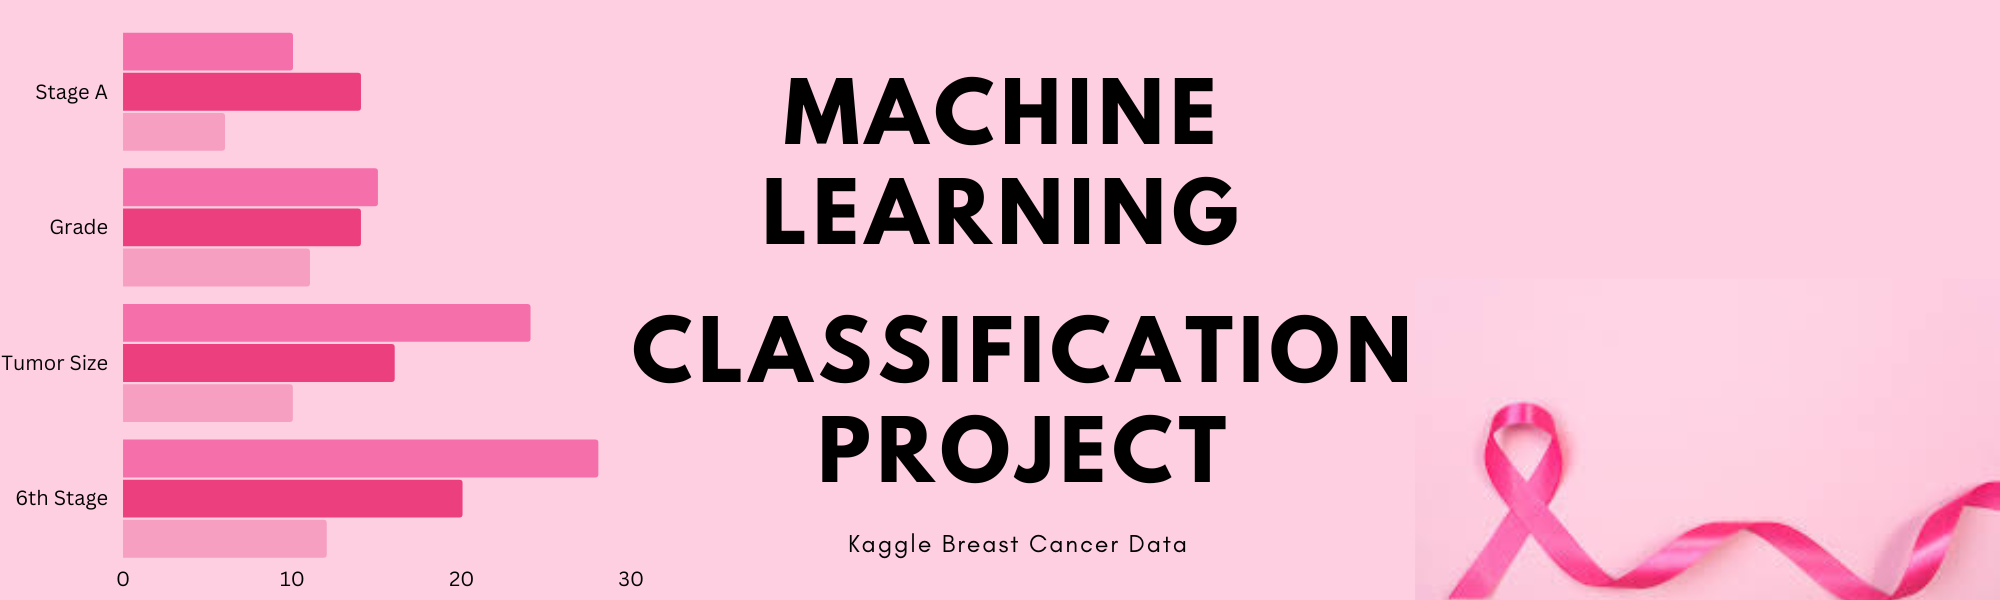

In [13]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn.preprocessing as preprocessing

# importing & merging the data

In [1]:
#import Kaggle API
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
#upload you kaggle api token (under profil >> settings >> API >> Create nEW Token) 
from google.colab import files

uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [6]:
#import the  dataset from kaggle via api
!kaggle datasets download -d reihanenamdari/breast-cancer

  0% 0.00/42.8k [00:00<?, ?B/s]
100% 42.8k/42.8k [00:00<00:00, 30.4MB/s]


In [11]:
#unzip the dataset zip file 
!unzip breast-cancer.zip

Archive:  breast-cancer.zip
  inflating: Breast_Cancer.csv       


In [12]:
df = pd.read_csv('Breast_Cancer.csv')

# Visualization of the data


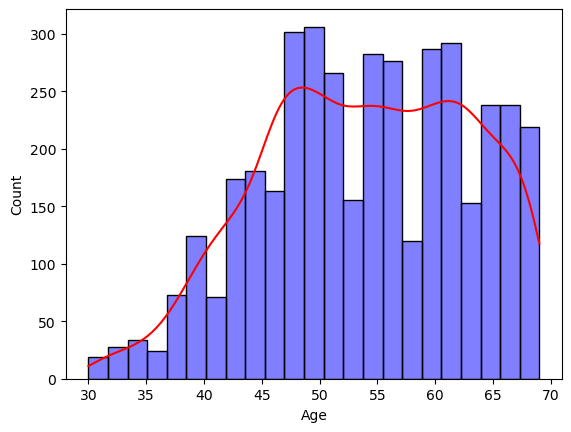

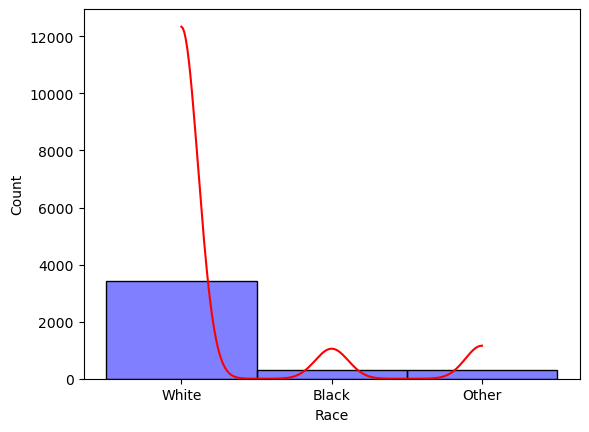

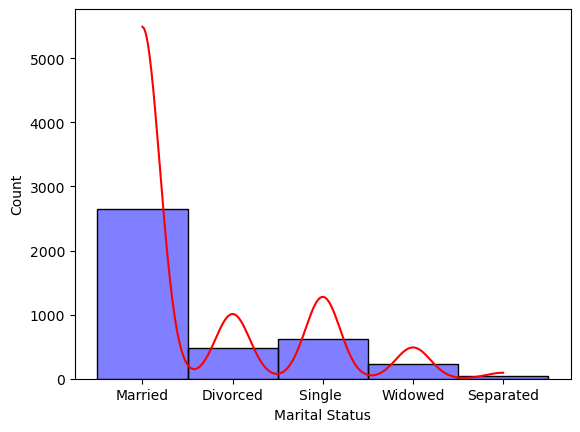

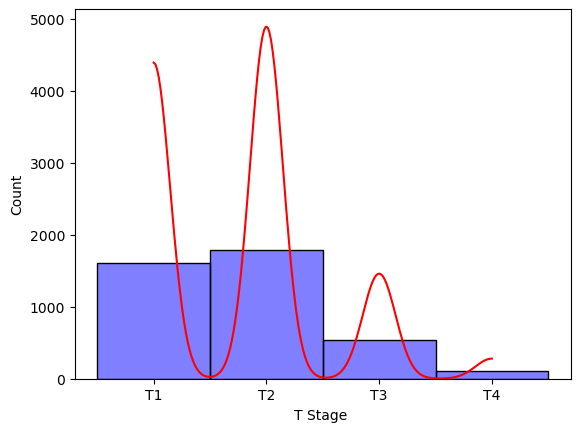

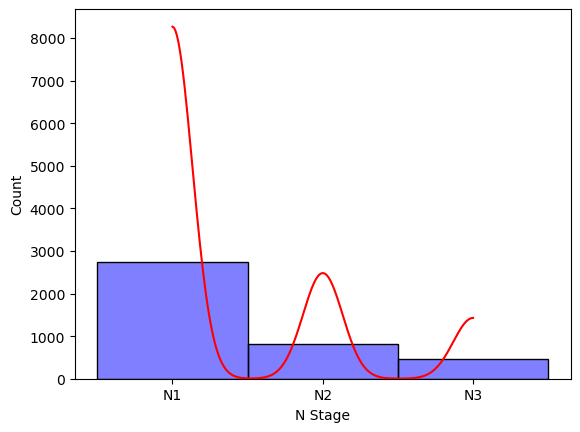

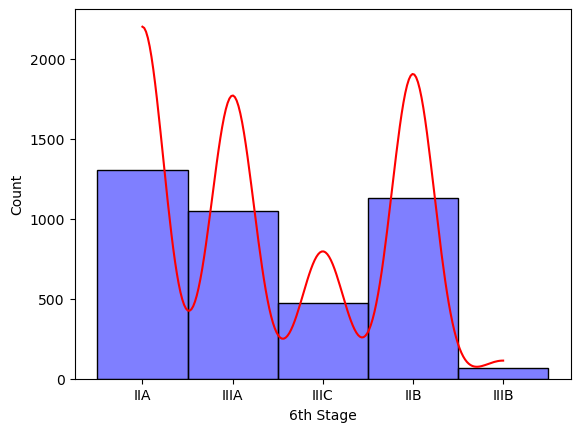

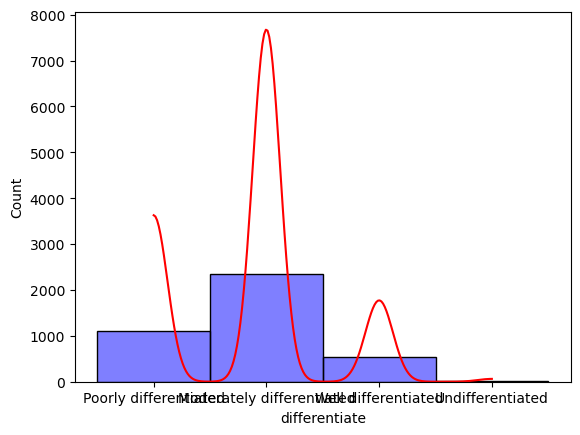

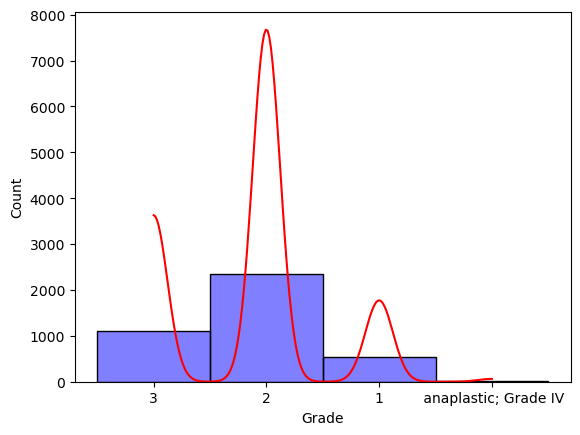

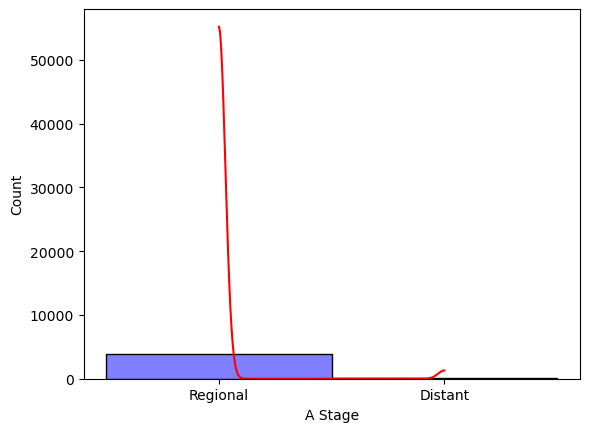

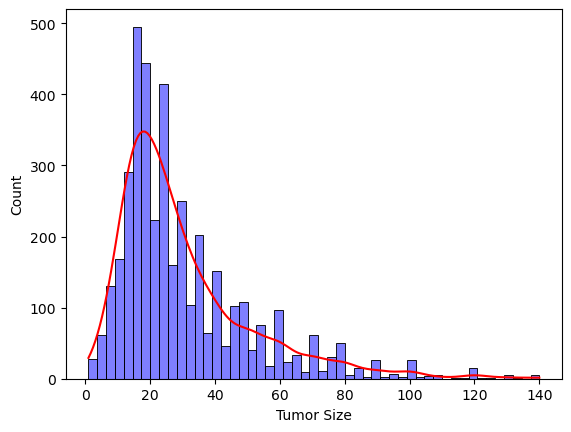

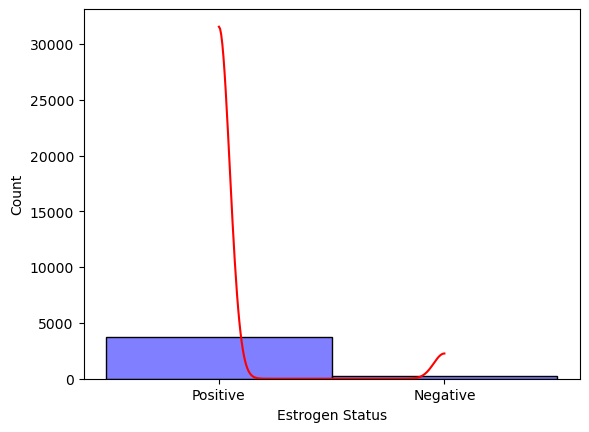

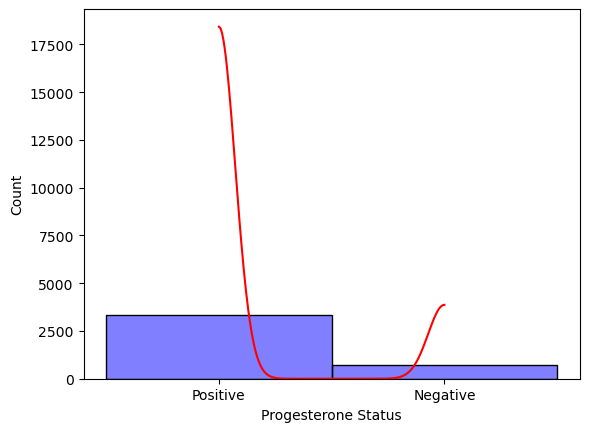

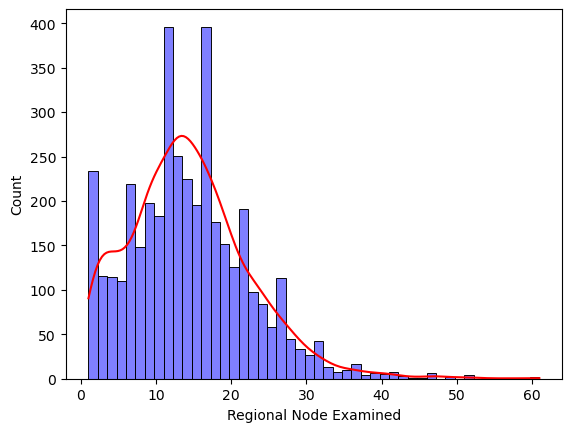

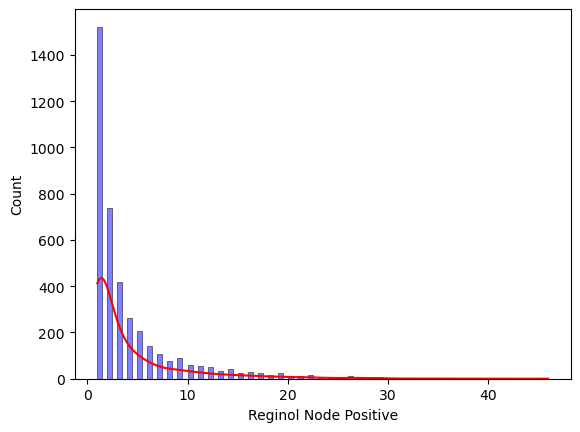

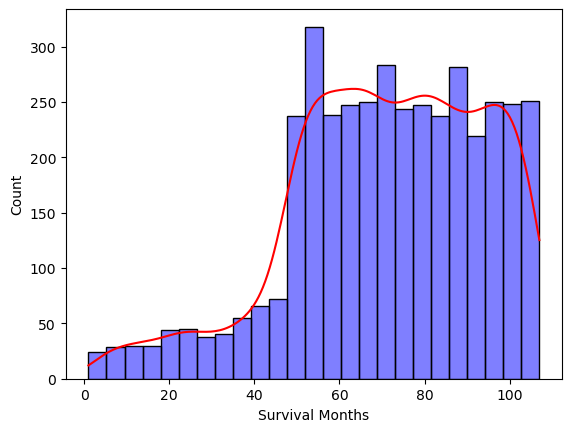

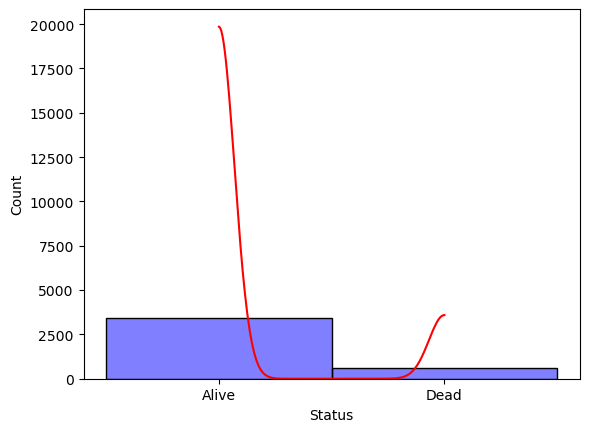

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
for i in df.columns:
    ax = sns.histplot(df, x = i, kde = True, color = "blue")
    ax.lines[0].set_color("red")
    plt.show()

In [ ]:
corr_matrix = df.corr().round(2)
corr_matrix_styled = corr_matrix.style.background_gradient()
corr_matrix_styled

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
Age,1.000000,-0.080000,-0.030000,0.010000,-0.010000
Tumor Size,-0.080000,1.000000,0.100000,0.240000,-0.090000
Regional Node Examined,-0.030000,0.100000,1.000000,0.410000,-0.020000
Reginol Node Positive,0.010000,0.240000,0.410000,1.000000,-0.140000
Survival Months,-0.010000,-0.090000,-0.020000,-0.140000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [ ]:
for i in df.columns: print(i, "  ",df[i].unique())

Age    [68 50 58 47 51 40 69 46 65 48 62 61 56 43 60 57 55 63 66 53 59 54 49 64
 42 37 67 31 52 33 45 38 39 36 41 44 32 34 35 30]
Race    ['White' 'Black' 'Other']
Marital Status    ['Married' 'Divorced' 'Single ' 'Widowed' 'Separated']
T Stage     ['T1' 'T2' 'T3' 'T4']
N Stage    ['N1' 'N2' 'N3']
6th Stage    ['IIA' 'IIIA' 'IIIC' 'IIB' 'IIIB']
differentiate    ['Poorly differentiated' 'Moderately differentiated' 'Well differentiated'
 'Undifferentiated']
Grade    ['3' '2' '1' ' anaplastic; Grade IV']
A Stage    ['Regional' 'Distant']
Tumor Size    [  4  35  63  18  41  20   8  30 103  32  13  59  15  19  46  24  25  29
  40  70  22  50  17  21  10  27  23   5  51   9  55 120  77   2  11  12
  26  75 130  34  80   3  60  14  16  45  36  76  38  49   7  72 100  43
  62  37  68  52  85  57  39  28  48 110  65   6 105 140  42  31  90 108
  98  47  54  61  74  33   1  87  81  58 117  44 123 133  95 107  92  69
  56  82  66  78  97  88  53  83 101  84 115  73 125 104  94  86  64  96
  79  6

categorical variable: Status,Estrogen Status,Progesterone Status,T Stage,N Stage,6th Stage,differentiate,Grade,Race.

In [ ]:
data_encoder = preprocessing.OrdinalEncoder(categories = [['T1','T2','T3','T4'],['N1','N2','N3'],['IIA','IIB','IIIA','IIIB','IIIC'],
                                                         ['1','2','3',' anaplastic; Grade IV'],['Regional','Distant'],
                                                         ['Negative','Positive'],['Negative','Positive'],['Alive','Dead']])


In [ ]:
df[['T Stage ','N Stage','6th Stage','Grade','A Stage','Estrogen Status','Progesterone Status','Status']] = data_encoder.fit_transform(df[['T Stage ','N Stage','6th Stage','Grade','A Stage','Estrogen Status','Progesterone Status','Status']].values.reshape(-8, 8))

In [ ]:
df[['T Stage ','N Stage','6th Stage','Grade','A Stage','Estrogen Status','Progesterone Status','Status']]

,T Stage,N Stage,6th Stage,Grade,A Stage,Estrogen Status,Progesterone Status,Status
0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0
1,1.0,1.0,2.0,1.0,0.0,1.0,1.0,0.0
2,2.0,2.0,4.0,1.0,0.0,1.0,1.0,0.0
3,0.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0
4,1.0,0.0,1.0,2.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...
4019,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4020,1.0,1.0,2.0,1.0,0.0,1.0,1.0,0.0
4021,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
4022,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0


In [ ]:
data_encoder.categories_

[array(['T1', 'T2', 'T3', 'T4'], dtype=object),
 array(['N1', 'N2', 'N3'], dtype=object),
 array(['IIA', 'IIB', 'IIIA', 'IIIB', 'IIIC'], dtype=object),
 array(['1', '2', '3', ' anaplastic; Grade IV'], dtype=object),
 array(['Regional', 'Distant'], dtype=object),
 array(['Negative', 'Positive'], dtype=object),
 array(['Negative', 'Positive'], dtype=object),
 array(['Alive', 'Dead'], dtype=object)]

In [ ]:
corr_matrix = df.corr()[['Grade','A Stage']].round(2)
corr_matrix_styled = corr_matrix.style.background_gradient()
corr_matrix_styled

,Grade,A Stage
Age,-0.100000,-0.020000
T Stage,0.130000,0.220000
N Stage,0.160000,0.260000
6th Stage,0.190000,0.290000
Grade,1.000000,0.040000
A Stage,0.040000,1.000000
Tumor Size,0.120000,0.120000
Estrogen Status,-0.210000,-0.070000
Progesterone Status,-0.180000,-0.030000
Regional Node Examined,0.080000,0.070000


In [ ]:
#sns.pairplot(df)

In [ ]:
df.groupby(['Grade']).mean()

,Age,T Stage,N Stage,6th Stage,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
Grade,,,,,,,,,,,,
0.0,55.289134,0.620626,0.257827,0.941068,0.018416,26.364641,0.985267,0.913444,12.675875,3.068140,72.937385,0.071823
1.0,54.322416,0.754998,0.401106,1.244577,0.018290,29.729051,0.965121,0.860485,14.387920,3.922586,72.179073,0.129732
2.0,52.615662,0.918992,0.600360,1.659766,0.035104,33.823582,0.843384,0.712871,15.111611,5.154815,68.749775,0.236724
3.0,52.315789,1.315789,0.736842,2.000000,0.000000,44.157895,0.736842,0.789474,14.473684,6.157895,64.421053,0.473684


In [ ]:
df.groupby(['A Stage']).mean()

,Age,T Stage,N Stage,6th Stage,Grade,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
A Stage,,,,,,,,,,,,
0.0,54.000763,0.758901,0.410732,1.265259,1.146745,30.073499,0.935656,0.828077,14.271617,3.976094,71.543744,0.147762
1.0,52.750000,1.891304,1.619565,3.739130,1.315217,47.576087,0.826087,0.760870,18.010870,11.934783,60.793478,0.380435


In [ ]:
df.groupby(['T Stage '])['Grade'].mean()

T Stage 
0.0    1.046787
1.0    1.204927
2.0    1.238274
3.0    1.372549
Name: Grade, dtype: float64

In [1]:
#tryng to push staff